 ### Deep Learning with Applications using Python (SAEON IVERTEBRATES CLASSIFICATION CHALLENGE)

In [1]:
# Import the required libraries

import tensorflow as tf
import keras 
import sklearn
import numpy as np
import matplotlib.pyplot as plt
import os, shutil
import pandas as pd

Using TensorFlow backend.


In [2]:
# Load the sample submission
sample = pd.read_csv('SampleSubmission .csv')

In [3]:
# Load the training and test set from directory
train_dir = 'C:/Users/ADEMOLA/Documents/AYOBAMI_DOCUMENT/SAEON Classification/train_small'
test_dir = 'C:/Users/ADEMOLA/Documents/AYOBAMI_DOCUMENT/SAEON Classification/test_small'

In [4]:
sample.head()

,FILE,Pteraster_capensis,Porifera,Astropecten_irregularis_pontoporeus,Terebratulina_sp_,Neolithodes_asperrimus,Munida_benguela,Cypraeovula_iutsui,Kaloplocamus_ramosus,Actinoscyphia_plebeia,...,Neptuneopsis_gilchristi,Pseudodromia_rotunda,Pecten_sulcicostatus,Plesionika_martia,Rossella_antarctica,Philine_aperta,Mycale_anisochela,Henricia_abyssalis,Triviella_spp_,Cheilostomatida
0,FNDG3L9.jpeg,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0RASRVM.jpeg,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,JMXLWAX.jpeg,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,CV8FWT2.jpeg,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,V34APYI.jpeg,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
# Create subfolders inside the train_dir
sub_folder = []
for column in sample.columns:
    column = os.path.join(train_dir, column)
    sub_folder.append(column)

In [6]:
# Build the model using transfer learning
from keras.applications import VGG16
conv_base = VGG16(weights='vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5', include_top=False, input_shape=(150,150,3))

In [7]:
# Feature Extraction and Data Processing

import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rescale=1./255)
batch_size = 20
def extract_features(directory, sample_count):
    features = np.zeros(shape=(sample_count, 4,4,512))
    labels = np.zeros(shape=(sample_count, 137))
    generator = datagen.flow_from_directory(directory, target_size=(150,150), batch_size=batch_size, class_mode='categorical')
    i=0
    for inputs_batch, labels_batch in generator:
        features_batch = conv_base.predict(inputs_batch)
        features[i*batch_size:(i+1)*batch_size] = features_batch
        labels[i*batch_size:(i+1)*batch_size] = labels_batch
        i+=1
        if i* batch_size>=sample_count:
            break
    return features, labels

In [8]:
# Extract the training features from the pre-trained network
train_features, train_labels = extract_features(train_dir, 3111)

Found 3111 images belonging to 137 classes.


In [9]:
# Reshape the training features
train_features = np.reshape(train_features, (3111, 4*4*512))

In [10]:
# Build the classifier
from keras  import models, layers, optimizers
model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_shape=(4*4*512,)))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(137, activation='softmax'))

# Compile the model
from keras import optimizers
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['acc'])

# Train the model
history = model.fit(train_features, train_labels, epochs=100, batch_size=100)

Epoch 1/100
3111/3111 [==============================] - 2s 746us/step - loss: 4.6497 - acc: 0.0659
Epoch 2/100
3111/3111 [==============================] - 2s 777us/step - loss: 3.6793 - acc: 0.1713
Epoch 3/100
3111/3111 [==============================] - 2s 726us/step - loss: 2.9348 - acc: 0.2591
Epoch 4/100
3111/3111 [==============================] - 2s 770us/step - loss: 2.4572 - acc: 0.3398
Epoch 5/100
3111/3111 [==============================] - 2s 766us/step - loss: 2.1109 - acc: 0.4134
Epoch 6/100
3111/3111 [==============================] - 2s 694us/step - loss: 1.7830 - acc: 0.4992 2
Epoch 7/100
3111/3111 [==============================] - 2s 737us/step - loss: 1.5671 - acc: 0.5526
Epoch 8/100
3111/3111 [==============================] - 2s 749us/step - loss: 1.3773 - acc: 0.5995
Epoch 9/100
3111/3111 [==============================] - 2s 754us/step - loss: 1.1968 - acc: 0.6429
Epoch 10/100
3111/3111 [==============================] - 2s 682us/step - loss: 1.0544 - acc: 0.68

3111/3111 [==============================] - 2s 699us/step - loss: 0.1246 - acc: 0.9656
Epoch 83/100
3111/3111 [==============================] - 2s 682us/step - loss: 0.1024 - acc: 0.9685
Epoch 84/100
3111/3111 [==============================] - 2s 677us/step - loss: 0.1072 - acc: 0.9688
Epoch 85/100
3111/3111 [==============================] - 2s 682us/step - loss: 0.0832 - acc: 0.9743
Epoch 86/100
3111/3111 [==============================] - 2s 682us/step - loss: 0.0923 - acc: 0.9730
Epoch 87/100
3111/3111 [==============================] - 2s 682us/step - loss: 0.1056 - acc: 0.9685
Epoch 88/100
3111/3111 [==============================] - 2s 704us/step - loss: 0.1024 - acc: 0.9717
Epoch 89/100
3111/3111 [==============================] - 2s 682us/step - loss: 0.0913 - acc: 0.9752
Epoch 90/100
3111/3111 [==============================] - 2s 699us/step - loss: 0.1090 - acc: 0.9701
Epoch 91/100
3111/3111 [==============================] - 2s 699us/step - loss: 0.1084 - acc: 0.9733
Epo

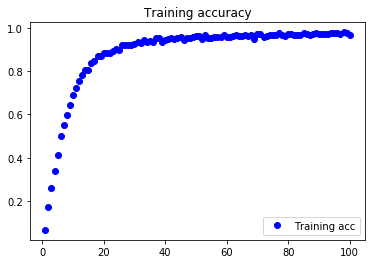

In [11]:
# Plot the accuracy
import matplotlib.pyplot as plt
acc = history.history['acc']
loss = history.history['loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.title('Training accuracy')
plt.legend(loc='best')
plt.show()

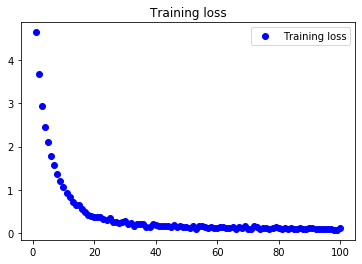

In [12]:
# Plot the loss
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.title('Training loss')
plt.legend(loc='best')
plt.show()

In [13]:
# Visualize some images and and check the predictions
my_img = plt.imread('01TO3K4.jpeg')

In [14]:
# Check the shape of the image
my_img.shape

(384, 512, 3)

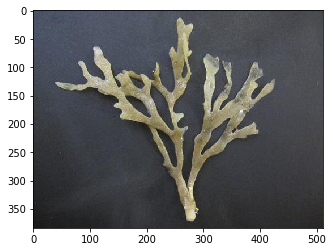

In [15]:
# Show the image
img = plt.imshow(my_img)

In [16]:
# Resize the image
from skimage.transform import resize
my_img_resize = resize(my_img, (150,150,3))

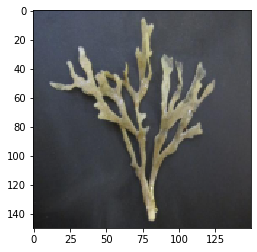

In [17]:
# Show the resized image
img = plt.imshow(my_img_resize)

In [18]:
# Reshape the image and extract the features from the conv_base
my_img_re = my_img_resize.reshape(1,150,150,3)
hi = conv_base.predict(my_img_re)

In [19]:
# Reshape the exatracted features
hi_1 = hi.reshape(1, 4*4*512)

In [20]:
hi_1.shape

(1, 8192)

In [21]:
# Get the probabilities
probabilities = model.predict(hi_1)

In [22]:
index = np.argsort(probabilities[0,:])

In [23]:
# Print the 3-most likely class
number_to_class = os.listdir(train_dir)
number_to_class.sort()

print('Most likely class:', number_to_class[index[136]], '--probability:', probabilities[0, index[136]])
print('Most likely class:', number_to_class[index[135]], '--probability:', probabilities[0, index[135]])
print('Most likely class:', number_to_class[index[134]], '--probability:', probabilities[0, index[134]])

Most likely class: Bryozoa --probability: 0.99999535
Most likely class: Stylasteridae --probability: 1.9781673e-06
Most likely class: Hydrozoa_spp --probability: 1.412762e-06


In [24]:
# Processing the test set for evaluation
test_dir = 'C:/Users/ADEMOLA/Documents/AYOBAMI_DOCUMENT/SAEON Classification/test_small/'

files = sorted(os.listdir(test_dir))

df = [test_dir+str(x) for x in files]   # A list containing the directory of all images in the test set

In [25]:
# Read the images in the test set to array using PIL and pylab
from PIL import Image
from pylab import *

list_1 = []
for i in df:
    img = array(Image.open(i))
    list_1.append(img)


In [26]:
# Resize the images in the test set
from skimage.transform import resize

list_2 = []
for i in list_1:
    my_img_resize = resize(i, (150,150,3))
    list_2.append(my_img_resize)


In [27]:
# Reshape the images in the test set
list_3 = []
for i in list_2:
    my_img_reshape = i.reshape(1,150,150,3)
    list_3.append(my_img_reshape)
    

In [28]:
# Feature extraction with the convolutionary base of the pretrained network
list_4 = []
for i in list_3:
    cb_pred = conv_base.predict(i)
    list_4.append(cb_pred)

In [29]:
# Reshape the array for the classifier model
list_5 = []
for i in list_4:
    c_reshape = i.reshape(1, 4*4*512)
    list_5.append(c_reshape)

In [30]:
# Predict with the classifier
my_pred = []
for i in list_5:
    predictions = model.predict(i)
    my_pred.append(predictions)

In [31]:
# Store the predicted_classes in a list
list_6 = []
for i in list_5:
    list_6.append(model.predict_classes(i))

In [32]:
# DataFrame for submission
new =  pd.DataFrame()
new['FILE'] = os.listdir(test_dir)
for i in os.listdir(train_dir):
    new[i] = 0

In [34]:
# One-Hot encode the predicted classes
from keras.utils import to_categorical
new_list = to_categorical(list_6)
new_list.shape

(1434, 137)

In [35]:
# Extract the One-Hot encoded results into the dataframe
for i, j in zip(new.index, new_list):
    new.iloc[i,1:] = j

In [36]:
# Convert to csv
new.to_csv('Answer.csv')

In [37]:
# Uncomment this if you want to use tqdm to read the test files
# import tqdm
# from tqdm import tqdm
# import pandas as pd
# from keras.preprocessing import image

# sample = pd.read_csv('SampleSubmission .csv')
# test_dir = 'C:/Users/ADEMOLA/Documents/AYOBAMI_DOCUMENT/SAEON Classification/test_small/'
# Load the test set and convert to NumPy arrays
# test_image = []
# for i in tqdm(range(sample.shape[0])):
#   img = image.load_img(test_dir+sample['FILE'][i], target_size=(150,150,3))
#    img = image.img_to_array(img)
#    img /= 255
#    test_image.append(img)
# test = np.array(test_image)
# pred_1 = conv_base.predict(test)
# predt = pred_1.reshape(1423, 4*4*512)
# pred_2 = model.predict_classes(predt)
# pred_3 = model.predict(predt)
# from keras.utils import to_categorical
# cat = to_categorical(pred_2)

In [39]:
new.head(20)

,FILE,Actiniaria,Actinoptilum_molle,Actinoscyphia_plebeia,Actinostola_capensis,Aequorea_spp,Africolaria_rutila,Alcyonacea,Amalda_bullioides,Anthoptilum_grandiflorum,...,Stereomastis_sculpta,Stylasteridae,Suberites_dandelenae,Sympagurus_dimorphus,Synallactes_viridilimus,Terebratulina_sp_,Toraster_tuberculatus,Triviella_spp_,Turritella_declivis,Vitjazmaia_latidactyla
0,00G9CO1.jpeg,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,01TO3K4.jpeg,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,01YAQRV.jpeg,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,02DO5WV.jpeg,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,035WZAQ.jpeg,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,05K5BNY.jpeg,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,05WUBST.jpeg,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,05ZA6XH.jpeg,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,06GT4CC.jpeg,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,06H81T5.jpeg,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
